In [323]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
import joblib

df=pd.read_csv("car_details5.csv")

In [334]:
df.head()

,ft,bt,km,transmission,ownerNo,oem,model,modelYear,centralVariantId,variantName,...,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,city,RPM,Turning Radius,car_age,price_per_mileage,price
0,4,2,1.844316,1,2.711325,20,160,-0.411256,-0.358057,1806,...,14,0.649672,-1.174166,0.219805,0,0.726191,-1.121924,0.411256,-0.793515,4.00
1,4,7,-0.738551,1,1.066150,6,50,0.385580,0.409360,288,...,17,-1.427541,-0.052357,0.219805,0,1.215990,0.643207,-0.385580,0.129044,8.11
2,4,2,-1.352712,1,-0.579025,29,273,0.385580,-0.720650,129,...,12,0.649672,-1.107049,-1.772668,0,0.726191,-0.533547,-0.385580,-0.574256,5.85
3,4,8,-1.179769,1,-0.579025,9,87,-0.676867,-1.126930,101,...,17,-1.427541,0.474989,-1.772668,0,0.726191,-1.121924,0.676867,-0.584884,4.62
4,1,7,0.069028,1,-0.579025,20,178,-0.411256,-0.249570,987,...,17,0.649672,-0.042769,0.219805,0,-1.233008,0.349019,0.411256,-0.305130,7.90


In [325]:
df=df.drop(columns=('Unnamed: 0'))

In [326]:
df['Gear Box']

0       5 Speed 
1        5 Speed
2        5 Speed
3       5 Speed 
4        5 Speed
          ...   
8364     5-Speed
8365     5 Speed
8366     7 Speed
8367     5 Speed
8368     6 Speed
Name: Gear Box, Length: 8369, dtype: object

In [ ]:
df['car_age'].info()

df=df.drop(columns=('Unnamed: 0'))

df.to_csv('car_details6.csv')

df['car_age']

df.to_csv('car_details5.csv')

null_value=df.isnull().sum()
null_col=null_value[null_value>0]
if null_col.empty:
    print('no')
else:
    print('yes:')
    print('null_col')

In [327]:
import pandas as pd



# Move the 'price' column to the last position
# Get all columns except 'price'
cols = [col for col in df.columns if col != 'price']
# Append 'price' to the list
cols.append('price')

# Assign the new column order to the DataFrame without duplicating
df = df[cols]

# Check the new columns order
print("Updated columns:", df.columns)



Updated columns: Index(['ft', 'bt', 'km', 'transmission', 'ownerNo', 'oem', 'model',
       'modelYear', 'centralVariantId', 'variantName',
       ...
       'Tyre Type', 'No Door Numbers', 'Cargo Volumn', 'Wheel Size', 'city',
       'RPM', 'Turning Radius', 'car_age', 'price_per_mileage', 'price'],
      dtype='object', length=221)


In [308]:

x=df.iloc[:,:-1]

Outliers detected in km:
 count    4.800000e+01
mean     3.829245e+05
std      8.216509e+05
min      1.560390e+05
25%      1.635122e+05
50%      1.766755e+05
75%      2.087755e+05
max      5.500000e+06
Name: km, dtype: float64 

Outliers detected in ownerNo:
 count    99.000000
mean      4.191919
std       0.395814
min       4.000000
25%       4.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: ownerNo, dtype: float64 

Outliers detected in modelYear:
 count     132.000000
mean     2003.643939
std         3.292677
min      1985.000000
25%      2003.000000
50%      2004.000000
75%      2006.000000
max      2006.000000
Name: modelYear, dtype: float64 

Outliers detected in Registration Year:
 count     130.000000
mean     2003.607692
std         3.304909
min      1985.000000
25%      2003.000000
50%      2004.000000
75%      2006.000000
max      2006.000000
Name: Registration Year, dtype: float64 

Outliers detected in Year of Manufacture:
 count     130.000000
mean  

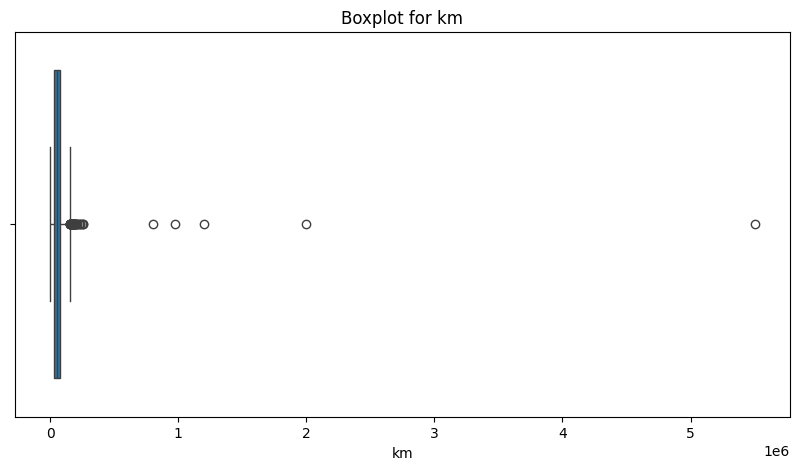

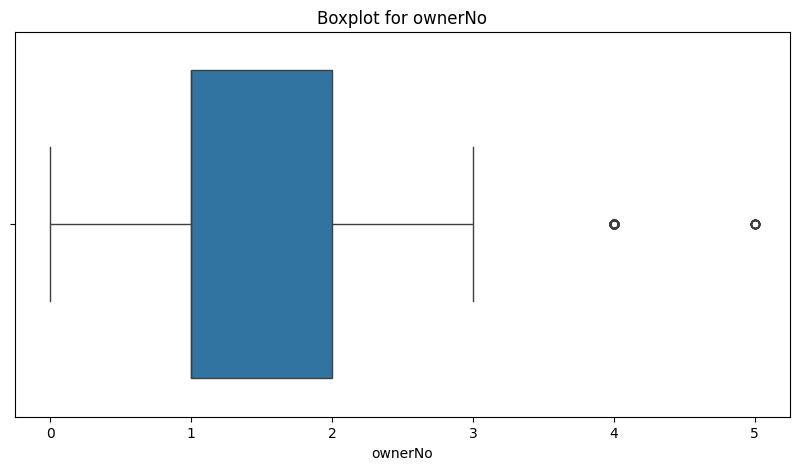

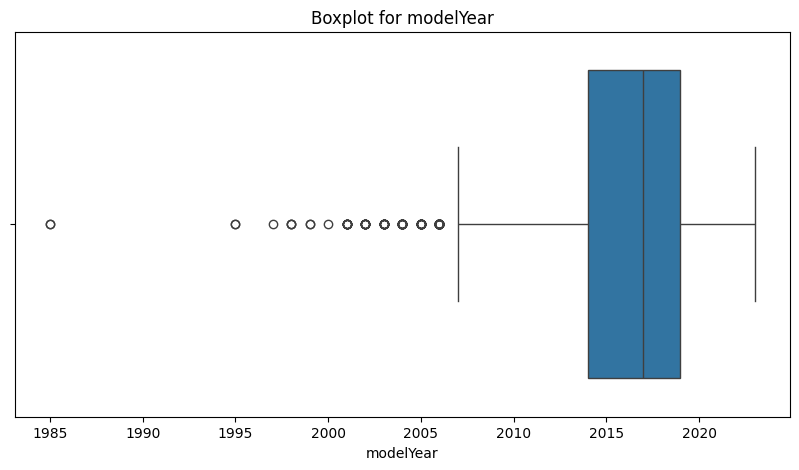

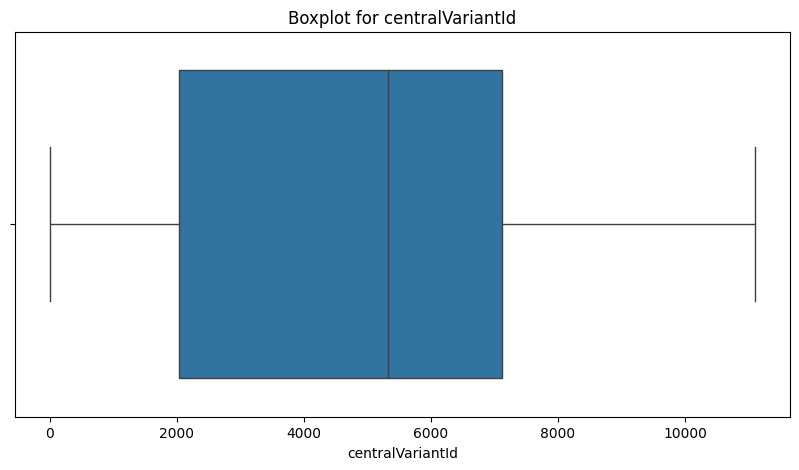

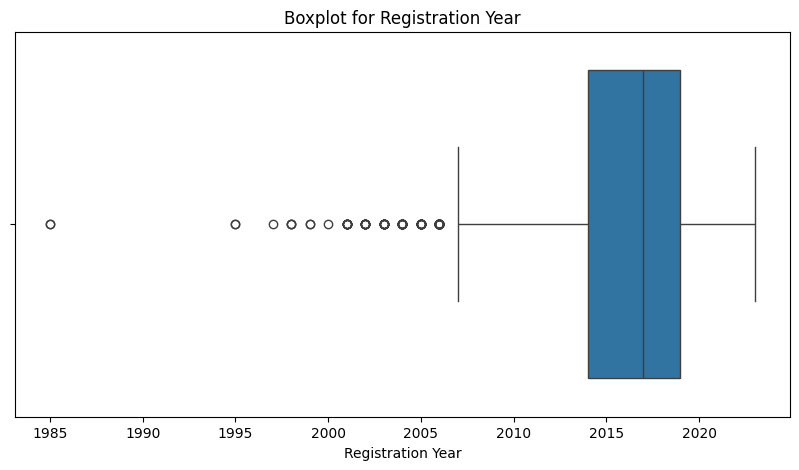

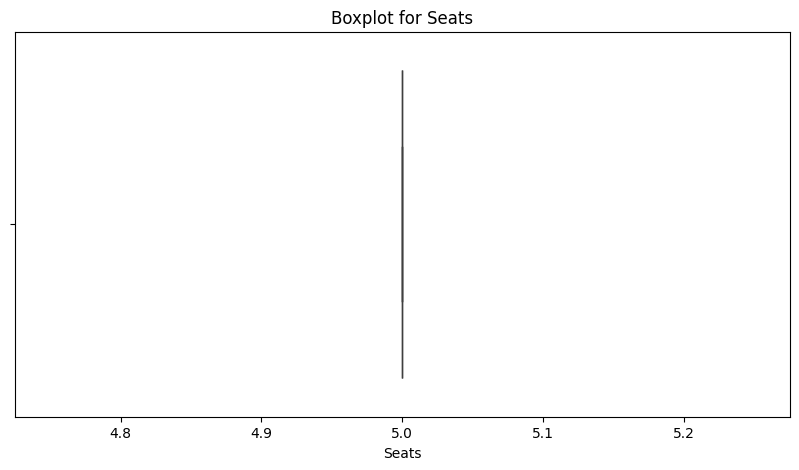

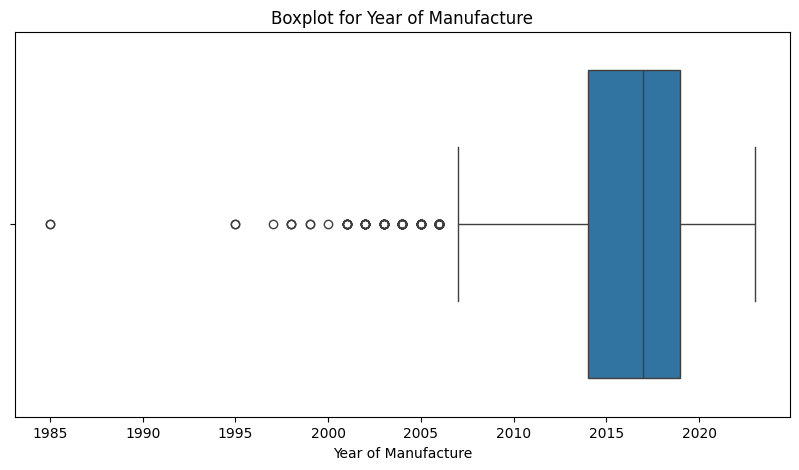

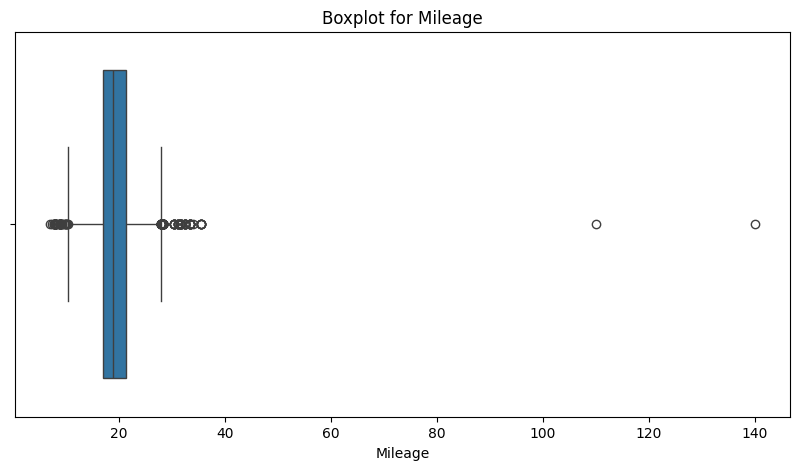

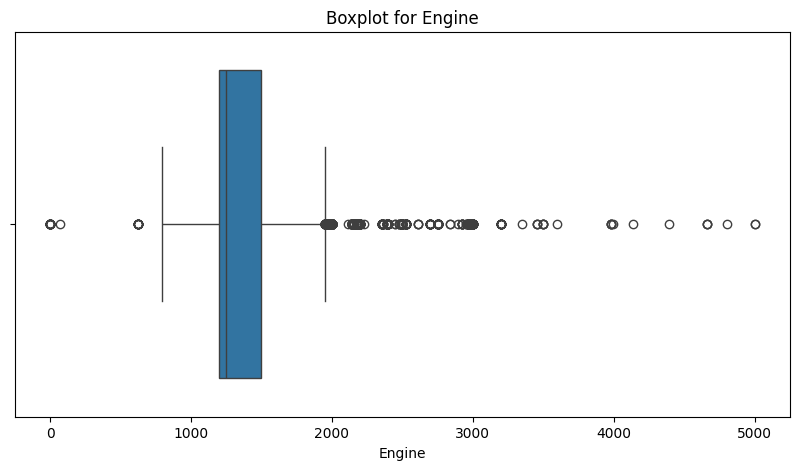

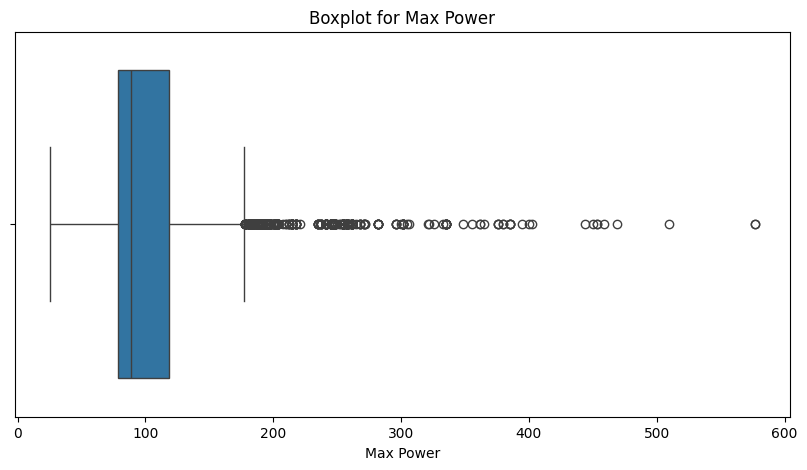

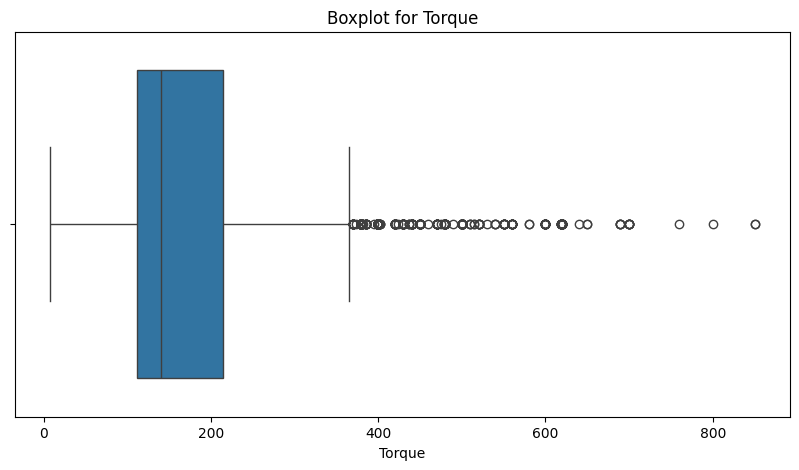

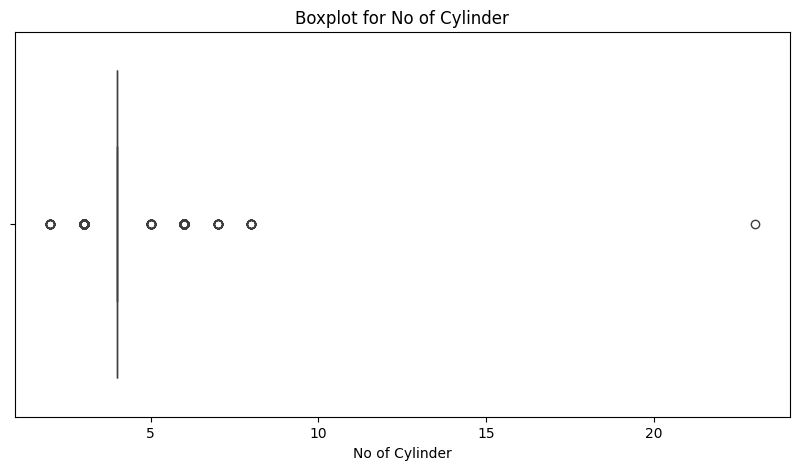

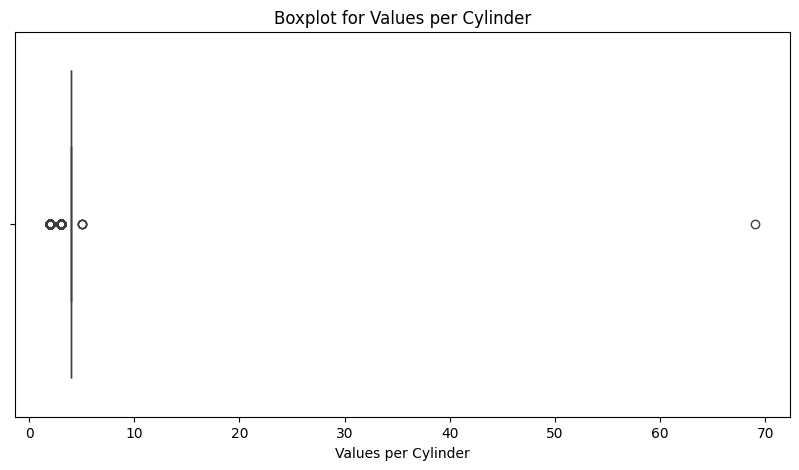

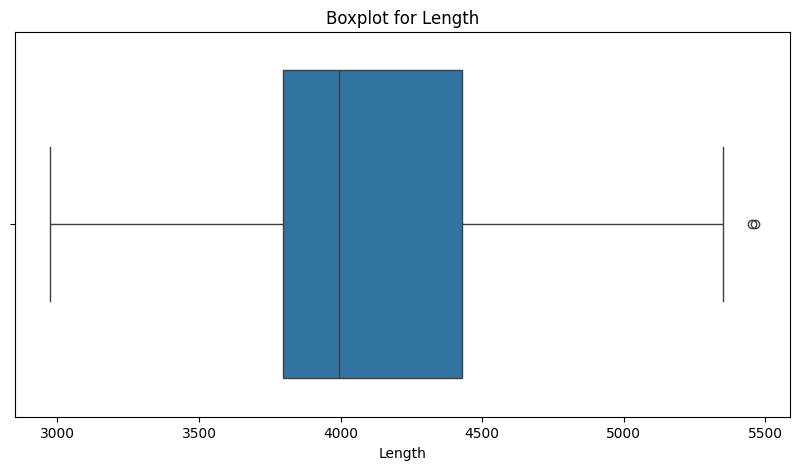

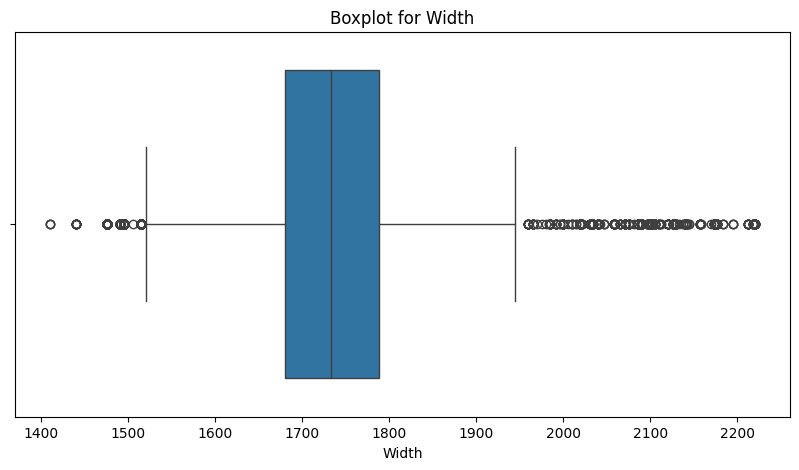

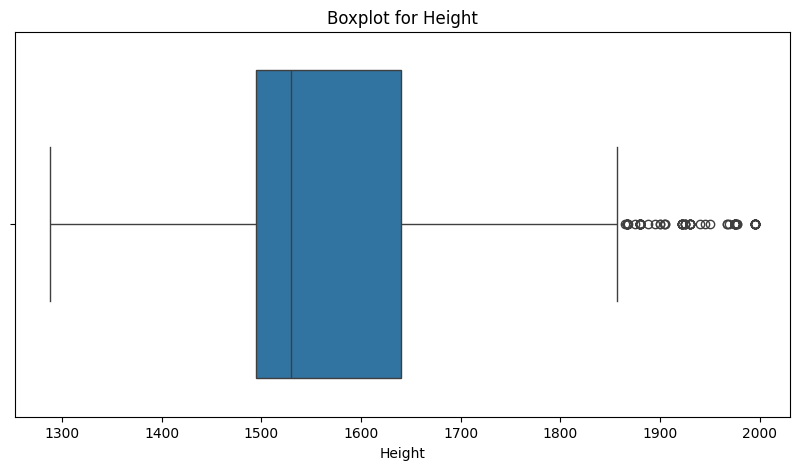

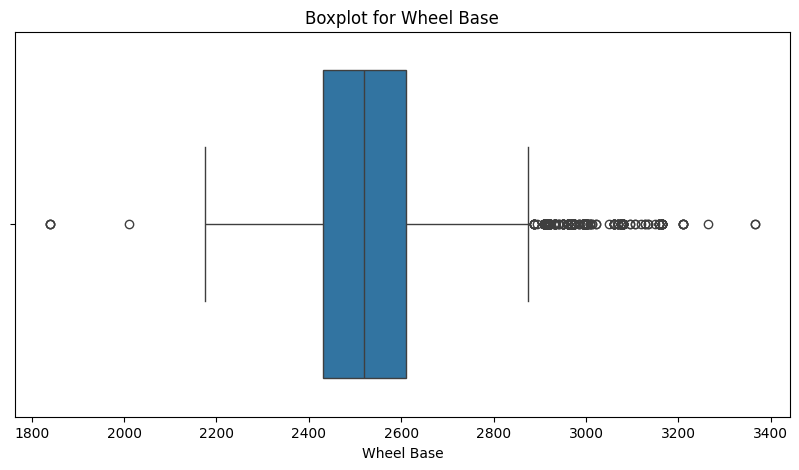

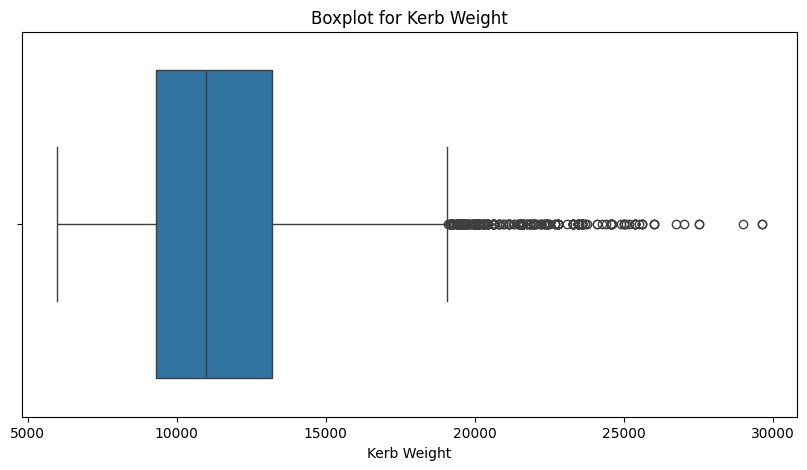

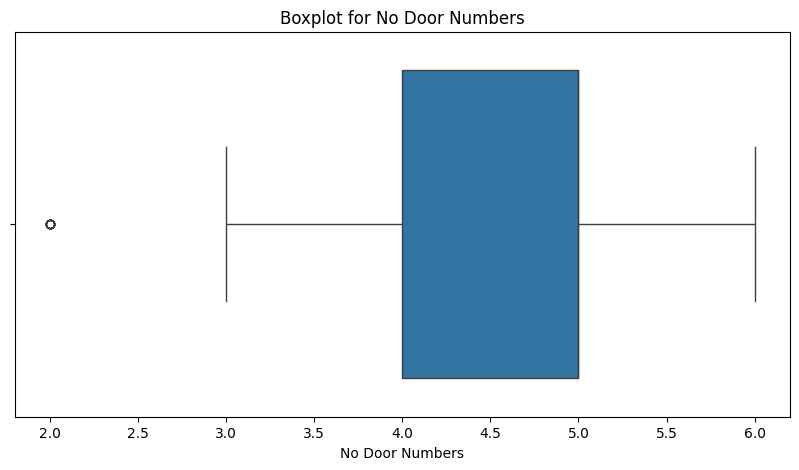

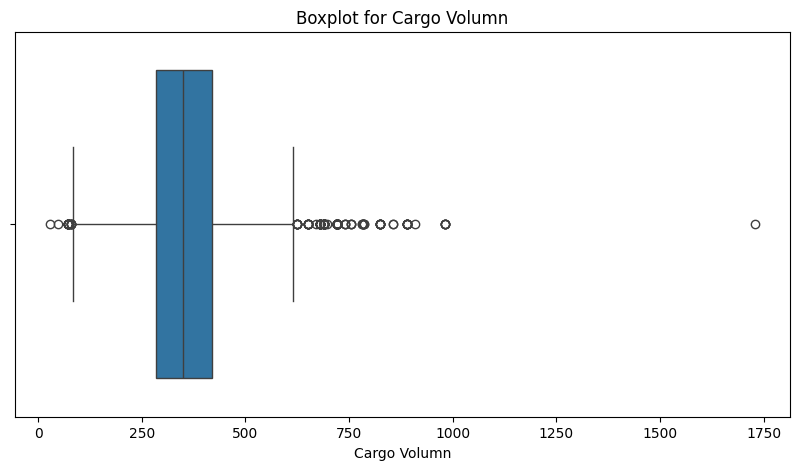

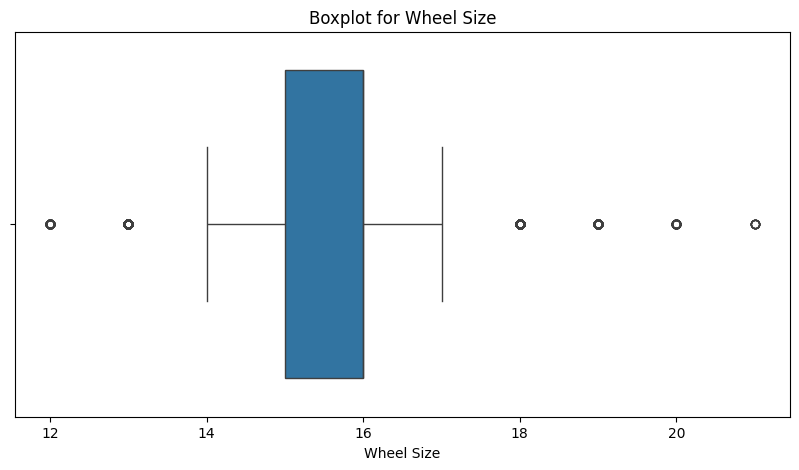

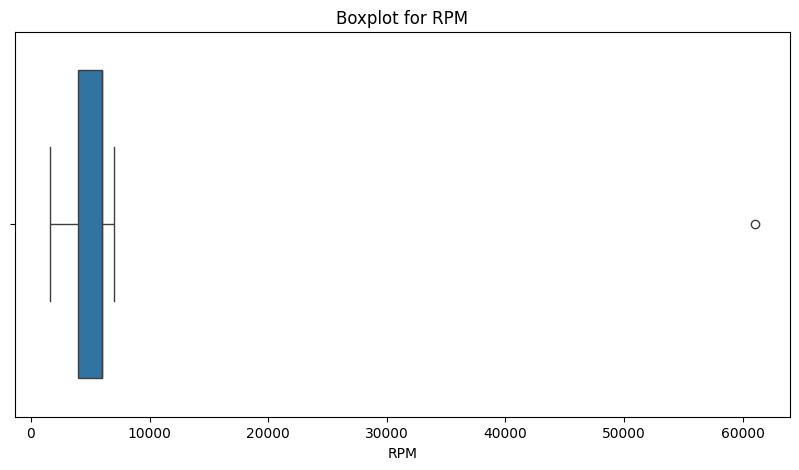

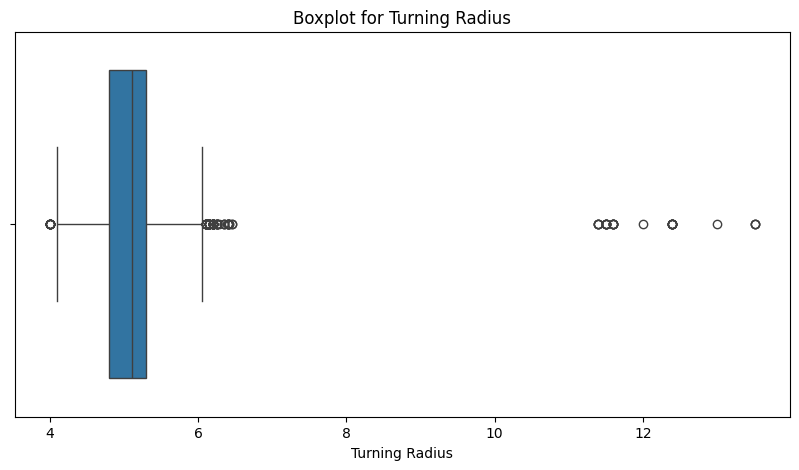

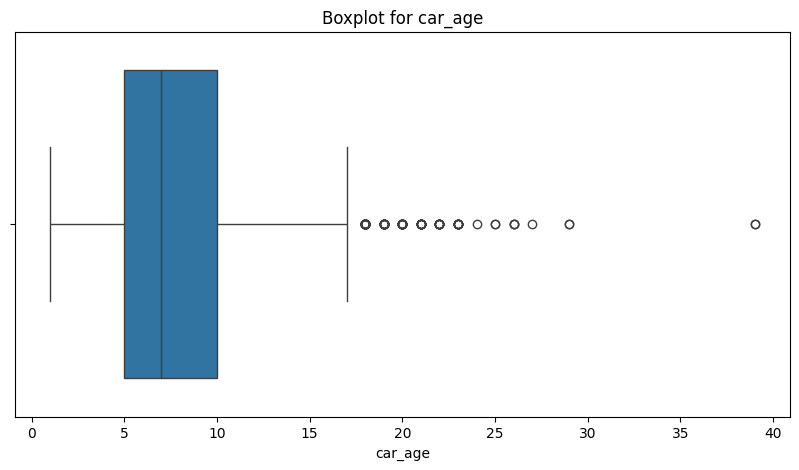

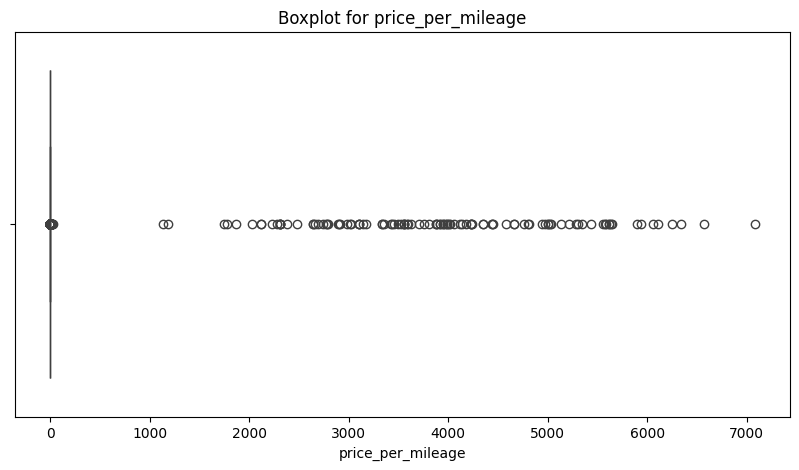

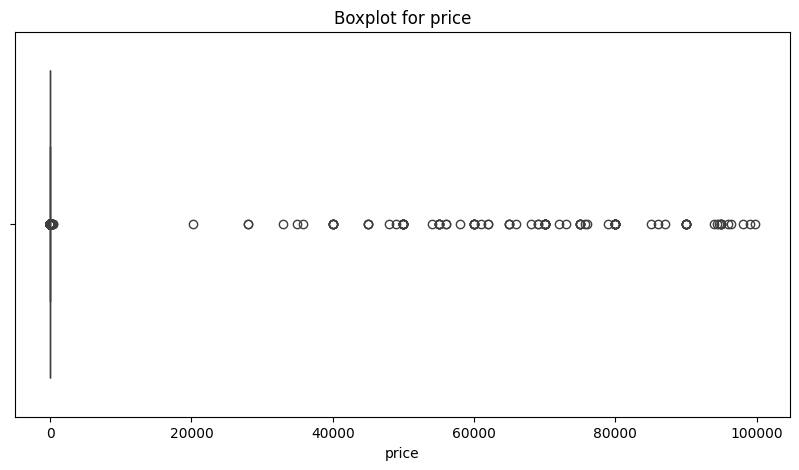

In [328]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns


# Step 2: Detect outliers using the IQR method
def detect_outliers_iqr(df, numerical_cols):
    outliers = {}
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Identify outliers
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    return outliers

# Step 3: Get outliers
outliers = detect_outliers_iqr(df, numerical_cols)
# Print outliers for each column
for col, outliers_col in outliers.items():
    if not outliers_col.empty:
        print(f"Outliers detected in {col}:\n", outliers_col.describe(), "\n")

# Step 4: Visualize outliers using boxplots
def plot_boxplots(df, numerical_cols):
    for col in numerical_cols:
        plt.figure(figsize=(10, 5))
        sns.boxplot(df, x=col)
        plt.title(f'Boxplot for {col}')
        plt.show()

# Plot the boxplots to visualize outliers
plot_boxplots(df, numerical_cols)

Before capping outliers:
          ft         bt      km transmission  ownerNo            oem  \
0     Petrol  Hatchback  120000       Manual        3         Maruti   
1     Petrol        SUV   32706       Manual        2           Ford   
2     Petrol  Hatchback   11949       Manual        1           Tata   
3     Petrol      Sedan   17794       Manual        1        Hyundai   
4     Diesel        SUV   60000       Manual        1         Maruti   
...      ...        ...     ...          ...      ...            ...   
8364  Petrol  Hatchback   10000       Manual        1         Maruti   
8365  Petrol  Hatchback  120000       Manual        1         Maruti   
8366  Petrol      Sedan   50000    Automatic        3  Mercedes-Benz   
8367  Petrol  Hatchback   40000       Manual        1         Maruti   
8368  Diesel        SUV  120000       Manual        2        Renault   

                      model  modelYear  centralVariantId  \
0            Maruti Celerio       2015            

C:\Users\anant\AppData\Local\Temp\ipykernel_35952\1851004912.py:48: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


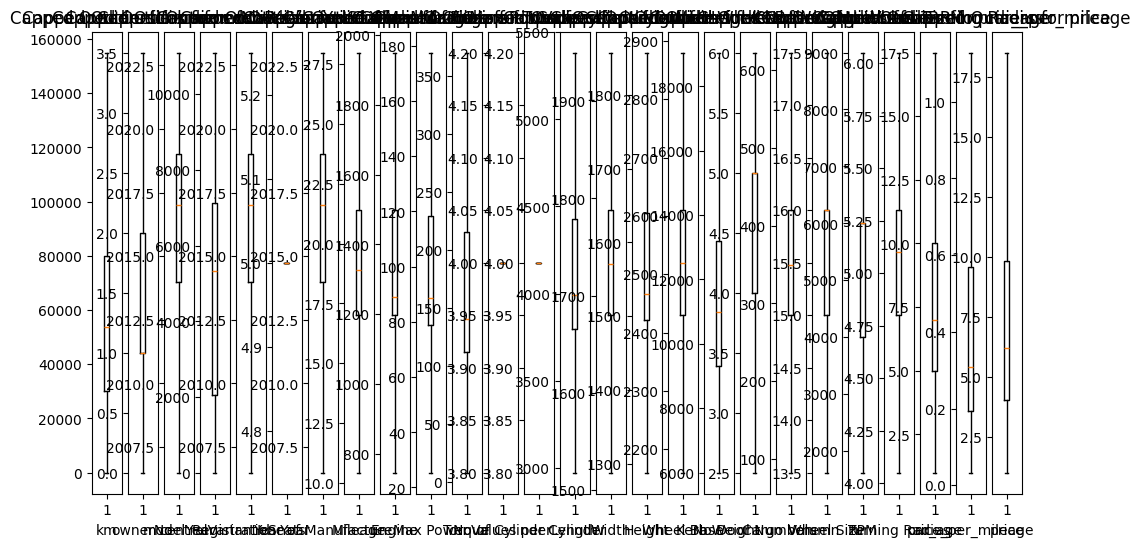

<Figure size 640x480 with 0 Axes>

In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Function to cap outliers using the IQR method
def cap_outliers_iqr(df):
    # Identify numeric columns (both int and float)
    numeric_cols = df.select_dtypes(include=[np.int64, np.float64]).columns.tolist()

    # Print identified numeric columns
    print(f"Identified numeric columns: {numeric_cols}")

    for column in numeric_cols:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap outliers
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Before capping outliers
print("Before capping outliers:")
print(df)

# Cap outliers
cap_outliers_iqr(df)

# After capping outliers
print("\nAfter capping outliers:")
print(df)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot for integer columns
numerical_cols= df.select_dtypes(include=['int','float']).columns.tolist()
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(1, len(numerical_cols), i)
    plt.title(f'Capped Outliers for {column}')
    plt.boxplot(df[column])
    plt.xlabel(column)

plt.tight_layout()
plt.show()

# Plotting float columns
#plt.figure(figsize=(12, 6))
#float_columns = df.select_dtypes(include=[np.float64]).columns.tolist()
#for i, column in enumerate(float_columns, 1):
    #plt.subplot(1, len(float_columns), i)
    #plt.title(f'Capped Outliers for {column}')
    #plt.boxplot(df[column])
    #plt.xlabel(column)

plt.tight_layout()
plt.show()

In [330]:
import pandas as pd
from sklearn.preprocessing import StandardScaler






# Identify numerical columns (excluding 'price')
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()  # Convert Index to list
numerical_cols = list(numerical_cols)  # Ensure it's a list
numerical_cols.remove('price')  # Exclude the price column

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])



# Save the updated DataFrame if needed
#df.to_csv('scaled_dataset.csv', index=False)

In [331]:
df.to_csv('scaled_dataset.csv', index=False)

In [332]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
import joblib
categorical_col=df.select_dtypes(include=['object']).columns
for col in categorical_col:
    df[col]=label_encoder.fit_transform(df[col])

In [333]:
df.to_csv('encoded_use_dataset.csv',index=False)

In [335]:
#EDA 

# Calculate descriptive statistics
summary_stats = df.describe()
print("Descriptive Statistics:\n", summary_stats)

# Calculate additional statistics like mode
modes = df.mode()
print("\nMode:\n", modes)



#catagorical_column

# Calculate standard deviation for specific numerical features
std_dev = df[numerical_cols].std()
print("\nStandard Deviation:\n", std_dev)

Descriptive Statistics:
                 ft           bt            km  transmission       ownerNo  \
count  8369.000000  8369.000000  8.369000e+03   8369.000000  8.369000e+03   
mean      2.986378     4.981479 -3.056463e-17      0.723145  2.207445e-17   
std       1.431784     2.706353  1.000060e+00      0.447471  1.000060e+00   
min       0.000000     0.000000 -1.706261e+00      0.000000 -2.224200e+00   
25%       1.000000     2.000000 -8.186166e-01      0.000000 -5.790253e-01   
50%       4.000000     7.000000 -1.176144e-01      1.000000 -5.790253e-01   
75%       4.000000     8.000000  6.607903e-01      1.000000  1.066150e+00   
max       4.000000     9.000000  2.879901e+00      1.000000  3.533912e+00   

               oem        model     modelYear  centralVariantId  variantName  \
count  8369.000000  8369.000000  8.369000e+03      8.369000e+03  8369.000000   
mean     16.191182   143.654081  4.515924e-15     -2.122544e-17  1158.559087   
std       8.520320    79.474560  1.000060

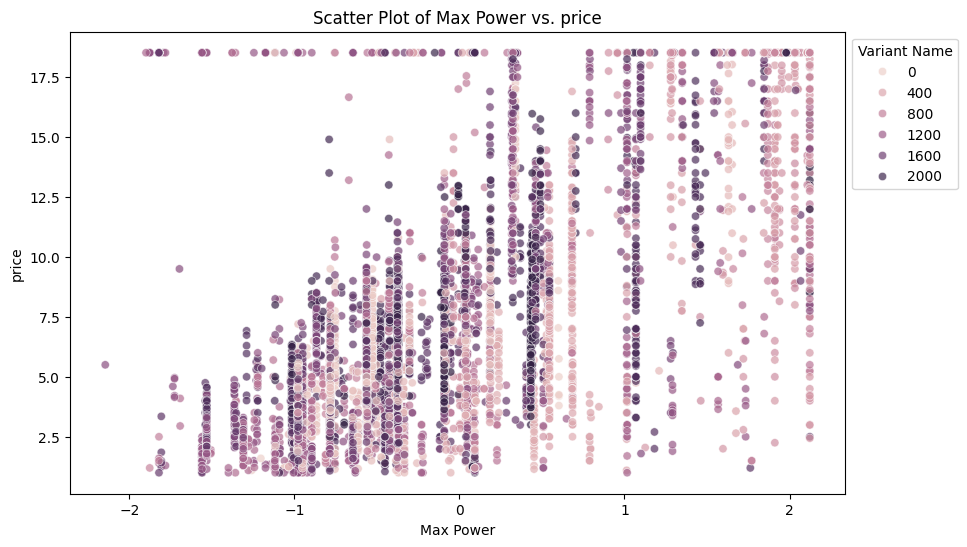

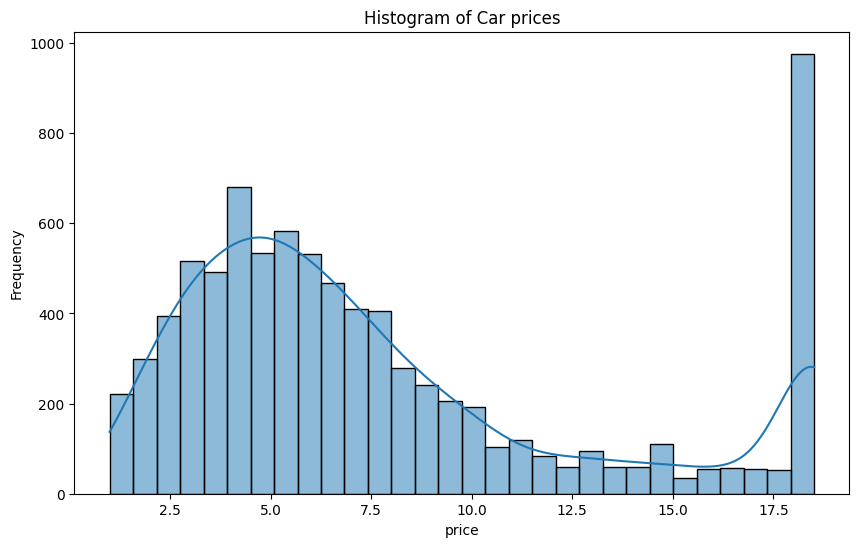

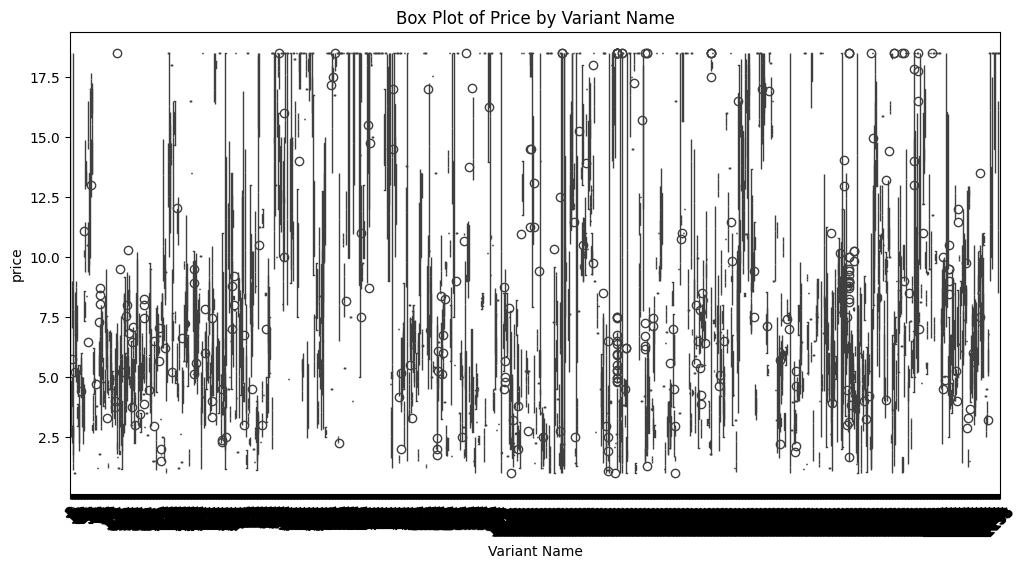

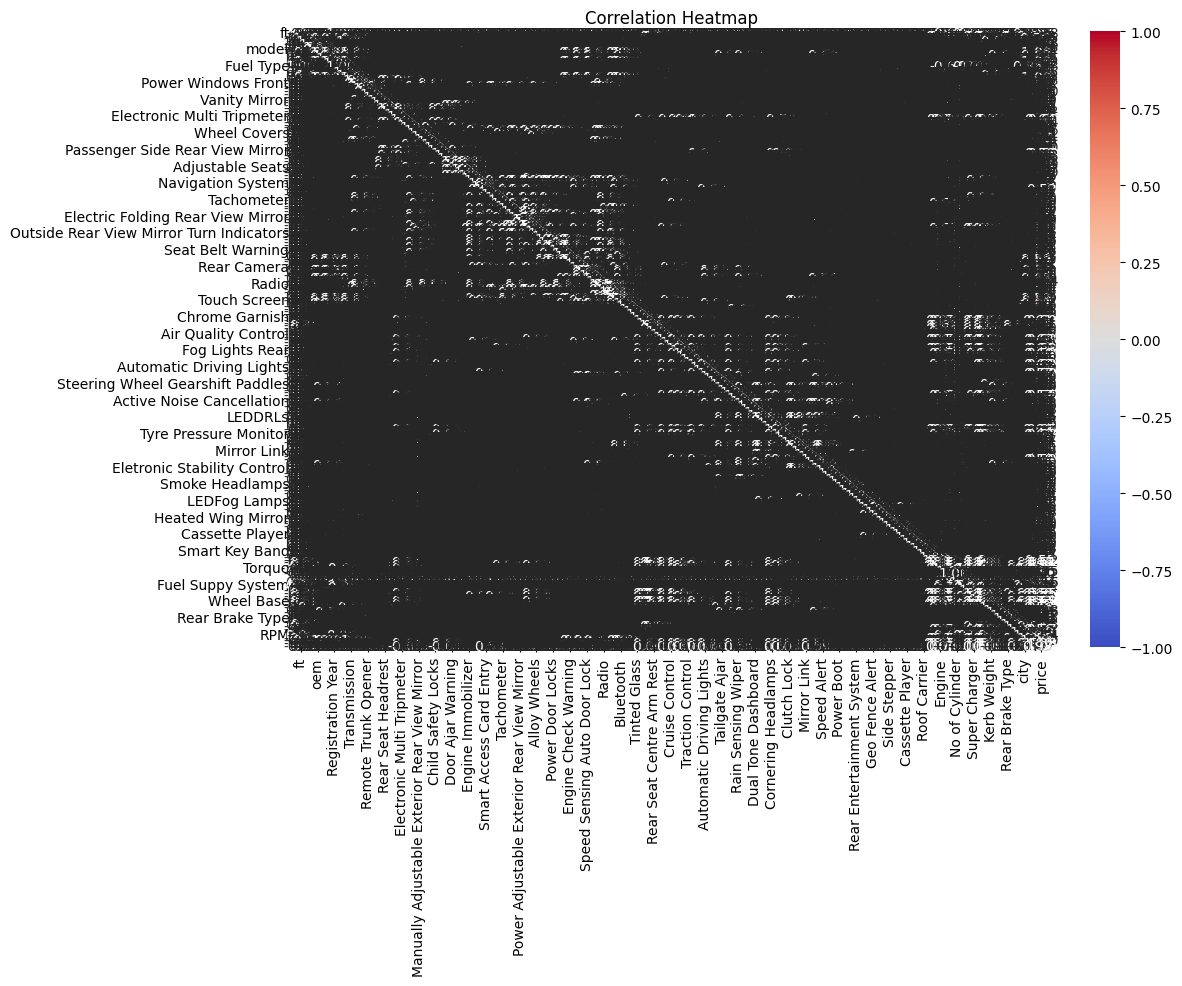

In [336]:
#Data Visualization

# Scatter Plot

import matplotlib.pyplot as plt
import seaborn as sns



#To visualize the relationship between two numerical features (e.g., 'Max Power' vs. 'Price'):

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Max Power', y='price', hue='variantName', alpha=0.7)
plt.title('Scatter Plot of Max Power vs. price')
plt.xlabel('Max Power')
plt.ylabel('price')
plt.legend(title='Variant Name', bbox_to_anchor=(1, 1))
plt.show()

# Histogram

#To visualize the distribution of a numerical feature (e.g., 'price'):

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Histogram of Car prices')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()


#Box Plot

#To visualize the distribution of prices across different variants (e.g., 'variantName'):

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='variantName', y='price')
plt.title('Box Plot of Price by Variant Name')
plt.xlabel('Variant Name')
plt.ylabel('price')
plt.xticks(rotation=45)
plt.show()

#Correlation Heatmap

#To visualize the correlation between numerical features:

plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [337]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor



# Define features and target variable
X = df.drop('price', axis=1)
y = df['price']

# Separate encoded categorical and scaled numerical columns
categorical_cols = X.select_dtypes(include=['int64']).columns.tolist()  # Adjust according to encoding
numerical_cols = X.select_dtypes(include=['float64']).columns.tolist()

# Train a Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Get feature importance
importance = model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

# Separate feature importance for categorical and numerical features
cat_importance_df = feature_importance_df[feature_importance_df['Feature'].isin(categorical_cols)]
num_importance_df = feature_importance_df[feature_importance_df['Feature'].isin(numerical_cols)]

# Get the top 10 most important features for categorical and numerical features
top_10_cat_importance = cat_importance_df.sort_values(by='Importance', ascending=False).head(10)
top_10_num_importance = num_importance_df.sort_values(by='Importance', ascending=False).head(10)

print("\nTop 10 Categorical Feature Importance:\n", top_10_cat_importance)
print("\nTop 10 Numerical Feature Importance:\n", top_10_num_importance)


Top 10 Categorical Feature Importance:
                Feature  Importance
14                 RTO    0.000181
194        Engine Type    0.000107
215               city    0.000095
206           Gear Box    0.000092
198  Fuel Suppy System    0.000070
193              Color    0.000070
9          variantName    0.000065
104  Rear Reading Lamp    0.000043
82                 Ebd    0.000033
6                model    0.000032

Top 10 Numerical Feature Importance:
                  Feature  Importance
219    price_per_mileage    0.969143
189              Mileage    0.027857
2                     km    0.000191
8       centralVariantId    0.000122
216                  RPM    0.000118
16   Year of Manufacture    0.000091
191            Max Power    0.000088
218              car_age    0.000083
203               Height    0.000077
202                Width    0.000073


In [341]:
# Train-Test Split

#We will split the dataset into training and testing sets to evaluate the model's performance. Common split ratios are 70-30 or 80-20.

from sklearn.model_selection import train_test_split

# Define features and target variable
X = df[['RTO','Engine Type','city','Gear Box','Fuel Suppy System','Color','variantName','model','price_per_mileage','Mileage','km','RPM','car_age','Max Power','Year of Manufacture','Height','Width']]   # Features
y = df['price']                # Target variable

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 6695
Testing set size: 1674


In [342]:
#Model Training

#Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
print("\nLinear Regression Model Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_linear))
print("R-squared:", r2_score(y_test, y_pred_linear))

#Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree model
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model
print("\nDecision Tree Model Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_tree))
print("R-squared:", r2_score(y_test, y_pred_tree))


#Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)

# Make predictions
y_pred_forest = forest_model.predict(X_test)

# Evaluate the model
print("\nRandom Forest Model Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_forest))
print("R-squared:", r2_score(y_test, y_pred_forest))

#Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("\nGradient Boosting Model Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_gb))
print("R-squared:", r2_score(y_test, y_pred_gb))


Linear Regression Model Performance:
Mean Squared Error: 0.38438057872582726
R-squared: 0.9857123806548506

Decision Tree Model Performance:
Mean Squared Error: 0.11044239844683419
R-squared: 0.9958948005286729

Random Forest Model Performance:
Mean Squared Error: 0.05107978087813582
R-squared: 0.9981013388661839

Gradient Boosting Model Performance:
Mean Squared Error: 0.09677220210153968
R-squared: 0.9964029285990412


In [344]:
#Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("\nBest Parameters from Grid Search:", grid_search.best_params_)
print("Best Score (MSE):", -grid_search.best_score_)


Best Parameters from Grid Search: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best Score (MSE): 0.05927800566769733


In [345]:
#Performance Metrics

def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2

from sklearn.metrics import mean_absolute_error

# Evaluate Linear Regression
mae_linear, mse_linear, r2_linear = evaluate_model(y_test, y_pred_linear)
print("\nLinear Regression Performance Metrics:")
print("Mean Absolute Error (MAE):", mae_linear)
print("Mean Squared Error (MSE):", mse_linear)
print("R-squared:", r2_linear)

# Evaluate Decision Tree
mae_tree, mse_tree, r2_tree = evaluate_model(y_test, y_pred_tree)
print("\nDecision Tree Performance Metrics:")
print("Mean Absolute Error (MAE):", mae_tree)
print("Mean Squared Error (MSE):", mse_tree)
print("R-squared:", r2_tree)

# Evaluate Random Forest
mae_forest, mse_forest, r2_forest = evaluate_model(y_test, y_pred_forest)
print("\nRandom Forest Performance Metrics:")
print("Mean Absolute Error (MAE):", mae_forest)
print("Mean Squared Error (MSE):", mse_forest)
print("R-squared:", r2_forest)


# Evaluate Gradientg Boosting
mae_gb, mse_gb, r2_gb = evaluate_model(y_test, y_pred_gb)
print("\nGradient Boosting Performance Metrics:")
print("Mean Absolute Error (MAE):", mae_gb)
print("Mean Squared Error (MSE):", mse_gb)
print("R-squared:", r2_gb)


Linear Regression Performance Metrics:
Mean Absolute Error (MAE): 0.4180135538221421
Mean Squared Error (MSE): 0.38438057872582726
R-squared: 0.9857123806548506

Decision Tree Performance Metrics:
Mean Absolute Error (MAE): 0.1162455197132668
Mean Squared Error (MSE): 0.11044239844683419
R-squared: 0.9958948005286729

Random Forest Performance Metrics:
Mean Absolute Error (MAE): 0.07629062126642852
Mean Squared Error (MSE): 0.05107978087813582
R-squared: 0.9981013388661839

Gradient Boosting Performance Metrics:
Mean Absolute Error (MAE): 0.18141756329905004
Mean Squared Error (MSE): 0.09677220210153968
R-squared: 0.9964029285990412


In [346]:
#Model Comparison


# Create a summary DataFrame for comparison
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'MAE': [mae_linear, mae_tree, mae_forest, mae_gb],
    'MSE': [mse_linear, mse_tree, mse_forest, mse_gb],
    'R-squared': [r2_linear, r2_tree, r2_forest, r2_gb]
})

# Sort by R-squared for better performance
comparison_df = comparison_df.sort_values(by='R-squared', ascending=False)

print("\nModel Comparison:")
print(comparison_df)


Model Comparison:
               Model       MAE       MSE  R-squared
2      Random Forest  0.076291  0.051080   0.998101
3  Gradient Boosting  0.181418  0.096772   0.996403
1      Decision Tree  0.116246  0.110442   0.995895
0  Linear Regression  0.418014  0.384381   0.985712


In [347]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Initialize and train the Lasso Regression model
lasso_model = Lasso(alpha=0.01)  # Adjust alpha for regularization strength
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model
print("\nLasso Regression Performance Metrics:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lasso))

#Ridge Regression (L2 Regularization)

#Ridge regression adds a penalty equivalent to the square of the magnitude of coefficients.

from sklearn.linear_model import Ridge

# Initialize and train the Ridge Regression model
ridge_model = Ridge(alpha=0.01)  # Adjust alpha for regularization strength
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
print("\nRidge Regression Performance Metrics:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_ridge))


Lasso Regression Performance Metrics:
Mean Squared Error: 0.389184558497731

Ridge Regression Performance Metrics:
Mean Squared Error: 0.38438120980257345


In [348]:
df.to_csv('model_.csv')

In [349]:
import pickle
pickle.dump(gb_model,open("model_best2.pkl","wb"))